
# Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones

<center>
<img 
     src="http://www2.famaf.unc.edu.ar/~efernandez/egeo/img/logos/famaf.jpg" 
     alt="Drawing" 
     style="width:30%;"
/>
</center>

### Universidad Nacional de Córdoba
---

## Practico
### Introduccion al Aprendizaje Automatico


Grupo 2: Luciano Mantovani, Juan Ignacio Barrionuevo Galtier, Antonela Sambuceti

## 1. Preparación del conjunto de datos

In [1]:
import pyarrow
import fastparquet
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import Normalizer 
from sklearn.tree import plot_tree

In [2]:
df = pd.read_parquet("df_final.parquet")

In [3]:
df

,dni_titular_movimiento,anio_mes_cupon,edad_cliente,antig_cliente,sexo_descripcion=Hombre,sexo_descripcion=Mujer,sexo_descripcion=Sin Datos,cargo_sector_desc_hist=Sector_Educativo,cargo_sector_desc_hist=Sector_Empleado_Comercio,cargo_sector_desc_hist=Sector_Financiero,...,producto_naranja_movimiento=VI,producto_naranja_movimiento=ZE,tipo_producto_tarjeta_movimiento=0,tipo_producto_tarjeta_movimiento=22,tipo_producto_tarjeta_movimiento=3,tipo_producto_tarjeta_movimiento=32,tipo_producto_tarjeta_movimiento=4,tipo_producto_tarjeta_movimiento=42,pca1,pca2
0,000000b5aea2c9ea7cc155f6ebcef97f826,202008,46.0,225,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,0.737508,-0.754260
1,000000b5aea2c9ea7cc155f6ebcef97f826,202009,47.0,226,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,0.790700,-0.774419
2,000000b5aea2c9ea7cc155f6ebcef97f826,202010,47.0,227,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,0.799810,-0.774967
3,000000b5aea2c9ea7cc155f6ebcef97f826,202011,47.0,228,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,0.808919,-0.775516
4,000000b5aea2c9ea7cc155f6ebcef97f826,202012,47.0,229,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,0.818028,-0.776066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7509,000f0b73ebfa002a79a0642b82e87919904,202101,64.0,21,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,69.0,138.0,0.0,276.0,0.0,0.0,0.0,-0.138055,-0.247961
7510,000f0b73ebfa002a79a0642b82e87919904,202102,64.0,22,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,69.0,138.0,0.0,138.0,0.0,0.0,0.0,-0.113508,-0.187562
7511,000f0b73ebfa002a79a0642b82e87919904,202103,64.0,23,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,138.0,0.0,207.0,0.0,0.0,0.0,-0.265320,-0.823430
7512,000f0b73ebfa002a79a0642b82e87919904,202104,64.0,24,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,69.0,138.0,0.0,276.0,0.0,0.0,0.0,-0.223349,-0.694242


In [4]:
df['monto_ajustado'].describe().round(2)

count       7514.00
mean      807589.43
std      1025642.13
min      -977066.91
25%        65113.61
50%       427092.40
75%      1177538.20
max      9249133.98
Name: monto_ajustado, dtype: float64

In [5]:
df[(df["dni_titular_movimiento"] =="000f0b73ebfa002a79a0642b82e87919904")]['monto_ajustado'].sum()

3348765.2700000023

In [4]:
df.shape

(7514, 54)

In [5]:
df.columns

Index(['dni_titular_movimiento', 'anio_mes_cupon', 'edad_cliente',
       'antig_cliente', 'sexo_descripcion=Hombre', 'sexo_descripcion=Mujer',
       'sexo_descripcion=Sin Datos', 'cargo_sector_desc_hist=Sector_Educativo',
       'cargo_sector_desc_hist=Sector_Empleado_Comercio',
       'cargo_sector_desc_hist=Sector_Financiero',
       'cargo_sector_desc_hist=Sector_No_Operativo',
       'cargo_sector_desc_hist=Sector_Operativo',
       'cargo_sector_desc_hist=Sector_Salud',
       'cargo_sector_desc_hist=Sector_Seguridad',
       'cargo_sector_desc_hist=Sector_Sin_Datos', 'estado_civil_cat=Casado',
       'estado_civil_cat=Otros', 'estado_civil_cat=Sin_datos',
       'estado_civil_cat=Soltero', 'region=REGION CUYO',
       'region=REGION NORDESTE', 'region=REGION NOROESTE',
       'region=REGION PAMPEANA', 'region=REGION PATAGONIA', 'region=SIN DATOS',
       'monto_ajustado', 'comercio_cat=0', 'comercio_cat=1', 'comercio_cat=2',
       'comercio_cat=3', 'comercio_cat=4', 'comercio_

### 1.1 Selección de columnas

Seleccionamos las columnas con mayor variabilidad en el tiempo en cada dni

In [6]:
columnas = [x for x in df.columns if 'dni_titular' in x 
                       or 'anio_mes' in x 
                       or 'comercio_cat' in x
                       or 'producto_naranja' in x
                       or 'tipo_producto' in x
                       or 'monto_ajustado' in x
                       or 'antig_cliente' in x]

In [7]:
df_obj = df[columnas].copy()

In [8]:
df_obj.shape

(7514, 30)

### 1.2 Creación de variable categórica 

Creamos una columna que indica si un cliente ha aumentado su consumo personal mes a mes. El mes inicial para cada cliente se inicializa en 0.

Cabe destacar que a la hora de agrupar los movimientos en cada mes, se considera la fecha de cierre de la tarjeta, por lo cual cada mes comprende desde el dia 25 del mes anterior hasta el dia 24 del corriente, inclusive. 

In [9]:
df_dni_mes_mon = df_obj[['dni_titular_movimiento', 'anio_mes_cupon','monto_ajustado']] \
                        .groupby(['dni_titular_movimiento', 'anio_mes_cupon']).sum('monto_ajustado') \
                        .reset_index() \
                        .sort_values(by=['dni_titular_movimiento', 'anio_mes_cupon'])
df_dni_mes_mon

,dni_titular_movimiento,anio_mes_cupon,monto_ajustado
0,000000b5aea2c9ea7cc155f6ebcef97f826,202008,-325.68
1,000000b5aea2c9ea7cc155f6ebcef97f826,202009,-318.09
2,000000b5aea2c9ea7cc155f6ebcef97f826,202010,-307.74
3,000000b5aea2c9ea7cc155f6ebcef97f826,202011,-299.46
4,000000b5aea2c9ea7cc155f6ebcef97f826,202012,-290.49
...,...,...,...
7509,000f0b73ebfa002a79a0642b82e87919904,202101,801535.05
7510,000f0b73ebfa002a79a0642b82e87919904,202102,867100.92
7511,000f0b73ebfa002a79a0642b82e87919904,202103,183752.52
7512,000f0b73ebfa002a79a0642b82e87919904,202104,323309.16


In [10]:
# Agregación de la nueva columna seteada en 0.
# En la iteración, se le cambia el valor a 1 en caso de que cumpla con las condiciones preestablecidas.

df_dni_mes_mon['fg_aumentado'] = 0
for i in range(1,len(df_dni_mes_mon)):
    if (df_dni_mes_mon.iloc[i]['dni_titular_movimiento'] == df_dni_mes_mon.iloc[i-1]['dni_titular_movimiento']) \
        & (df_dni_mes_mon.iloc[i]['anio_mes_cupon'] > df_dni_mes_mon.iloc[i-1]['anio_mes_cupon']):
            var_mes = df_dni_mes_mon.iloc[i]['monto_ajustado'] - df_dni_mes_mon.iloc[i-1]['monto_ajustado']
            if (var_mes > (abs(df_dni_mes_mon.iloc[i-1]['monto_ajustado'])*0.1)):
                    df_dni_mes_mon.iloc[i,3] = 1

In [11]:
df_dni_mes_mon.head(20)

,dni_titular_movimiento,anio_mes_cupon,monto_ajustado,fg_aumentado
0,000000b5aea2c9ea7cc155f6ebcef97f826,202008,-325.68,0
1,000000b5aea2c9ea7cc155f6ebcef97f826,202009,-318.09,0
2,000000b5aea2c9ea7cc155f6ebcef97f826,202010,-307.74,0
3,000000b5aea2c9ea7cc155f6ebcef97f826,202011,-299.46,0
4,000000b5aea2c9ea7cc155f6ebcef97f826,202012,-290.49,0
5,000000b5aea2c9ea7cc155f6ebcef97f826,202101,-281.52,0
6,000000b5aea2c9ea7cc155f6ebcef97f826,202102,-273.93,0
7,000000b5aea2c9ea7cc155f6ebcef97f826,202103,-264.27,0
8,000000b5aea2c9ea7cc155f6ebcef97f826,202104,-256.68,0
9,000000b5aea2c9ea7cc155f6ebcef97f826,202105,-251.16,0


In [12]:
df_dni_mes_mon = df_dni_mes_mon.drop(columns=['monto_ajustado'])

In [13]:
df_dni_mes_mon = df_dni_mes_mon.rename(columns={'dni_titular_movimiento': 'dni_titular_movimiento_c', 'anio_mes_cupon': 'anio_mes_cupon_c'})
df_dni_mes_mon

,dni_titular_movimiento_c,anio_mes_cupon_c,fg_aumentado
0,000000b5aea2c9ea7cc155f6ebcef97f826,202008,0
1,000000b5aea2c9ea7cc155f6ebcef97f826,202009,0
2,000000b5aea2c9ea7cc155f6ebcef97f826,202010,0
3,000000b5aea2c9ea7cc155f6ebcef97f826,202011,0
4,000000b5aea2c9ea7cc155f6ebcef97f826,202012,0
...,...,...,...
7509,000f0b73ebfa002a79a0642b82e87919904,202101,1
7510,000f0b73ebfa002a79a0642b82e87919904,202102,0
7511,000f0b73ebfa002a79a0642b82e87919904,202103,0
7512,000f0b73ebfa002a79a0642b82e87919904,202104,1


In [14]:
df_obj = df_obj.merge( df_dni_mes_mon, 
             left_on=['dni_titular_movimiento', 'anio_mes_cupon'], 
             right_on=['dni_titular_movimiento_c', 'anio_mes_cupon_c']) \
        .drop(columns= ['dni_titular_movimiento_c','anio_mes_cupon_c'])

In [15]:
df_obj.shape

(7514, 31)

### 1.3 Correlación entre las variables

En el siguiente cuadro, vemos la correlación de las columnas con respecto a monto_ajustado. Podemos ver que el producto 'Plan Largo' y el tipo_producto 'Naranja' estan fuertemente correlacionados con monto_ajustado. Esto es de esperar ya que concentran la mayoria de los casos.

In [16]:
corr = df_obj.corr().round(2)
corr=corr[['monto_ajustado']]
corr.loc[:,'abs_corr']=np.abs(corr['monto_ajustado'])
corr.sort_values(by='abs_corr',ascending = False).style.background_gradient()

,monto_ajustado,abs_corr
monto_ajustado,1.000000,1.000000
tipo_producto_tarjeta_movimiento=3,0.620000,0.620000
producto_naranja_movimiento=PL,0.560000,0.560000
comercio_cat=1,0.420000,0.420000
fg_aumentado,0.390000,0.390000
producto_naranja_movimiento=ZE,0.360000,0.360000
comercio_cat=9,0.290000,0.290000
comercio_cat=0,0.280000,0.280000
producto_naranja_movimiento=VI,0.280000,0.280000
comercio_cat=5,0.280000,0.280000


En la siguiente figura, ilustramos el mapa de calor para visualizar la correlacion de todas las variables y encontrar aquellas columnas que nos aporten informacion redundante, las cuales habria que descartar a la hora de instanciar los modelos.

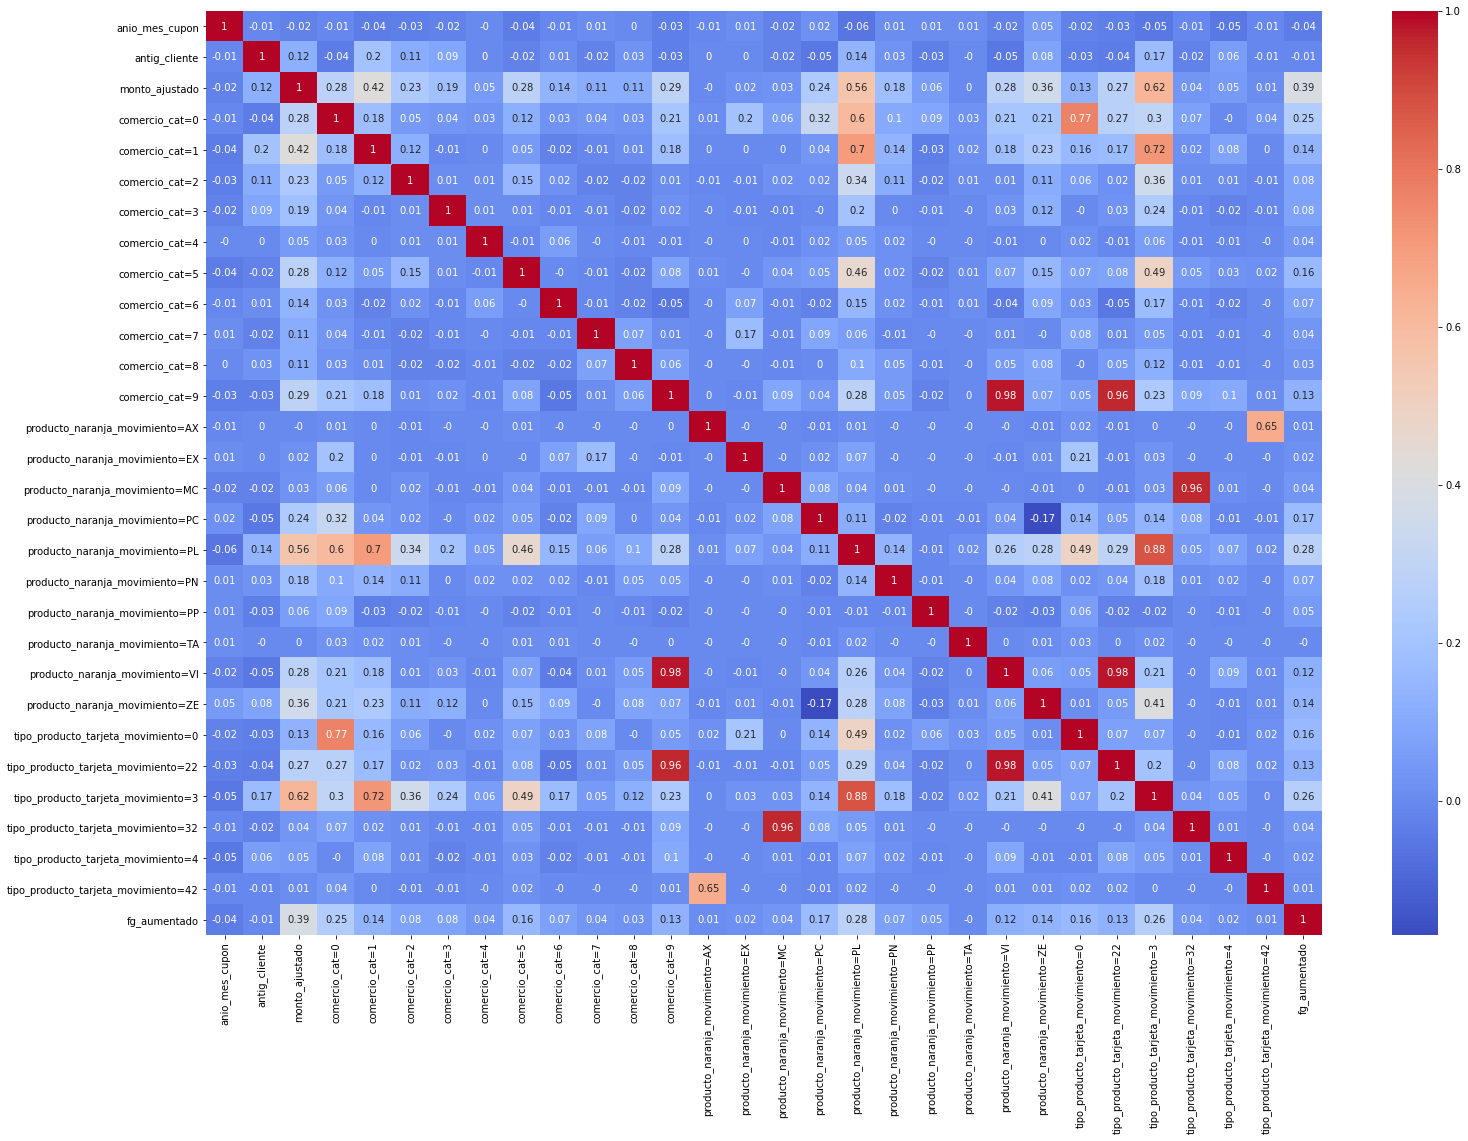

In [17]:
plt.figure(figsize=(25,17))
corr = df_obj.corr().round(2)
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot=True, cmap= 'coolwarm')
plt.show()

La variables que consideramos descartar son aquellas que tienen una relacion fuerte con otra pero dentro del mismo concepto. Es decir, si un producto naranja se relaciona fuertemente con un tipo_producto, es probable que expliquen lo mismo. 

Por una cuestion de conservar la integridad de los datos, decidimos mantener la categoria 'producto_naranja' por sobre 'tipo_producto_movimiento'. Es decir que, en aquellos casos donde exista una correlacion fuerte entre un producto y un tipo_producto, optamos por eliminar el tipo_producto.

Columnas a eliminar:
- **tipo_producto_tarjeta_movimiento=22**: Tiene una correlacion lineal cercana a 1 con el producto VISA.
- **tipo_producto_tarjeta_movimiento=32**: Tiene una correlacion lineal cercana a 1 con el producto MC.
- **tipo_producto_tarjeta_movimiento=42**: Tiene una correlacion lineal cercana a 1 con el producto AX.

In [18]:
df_obj = df_obj.drop(['tipo_producto_tarjeta_movimiento=22', 'tipo_producto_tarjeta_movimiento=32', 'tipo_producto_tarjeta_movimiento=42'], axis=1)

In [19]:
df_obj.shape

(7514, 28)

### 1.4 Normalización de las variables

Para los modelos de regresión polinomial, puede ser necesario un escalado de los datos previo al entrenamiento, ya que la variable 'monto_ajustado' varía en rangos más altos que las variables explicativas (variables X's). 

Por otro lado, para aquellos modelos de clasificación, probaremos por un lado la normalización de tipo L1 que permite eliminar la influencia de los valores atípicos, y por otro lado L2 que permite aumentar la distancia entre los diferentes puntos a clasificar, y de esta forma permite encontrar de manera más eficiente el hiperplano de separación. 

In [142]:
df_obj.to_parquet('df_preprocesado.parquet')

## 2. División del conjunto de datos

Debido a que nuestros datos se encuentran ordenados temporalmente, no consideramos pertinente hacer una mezcla aleatoria de los mismos, previo a la división.

In [20]:
df_obj.groupby(['anio_mes_cupon']).count()

,dni_titular_movimiento,antig_cliente,monto_ajustado,comercio_cat=0,comercio_cat=1,comercio_cat=2,comercio_cat=3,comercio_cat=4,comercio_cat=5,comercio_cat=6,...,producto_naranja_movimiento=PL,producto_naranja_movimiento=PN,producto_naranja_movimiento=PP,producto_naranja_movimiento=TA,producto_naranja_movimiento=VI,producto_naranja_movimiento=ZE,tipo_producto_tarjeta_movimiento=0,tipo_producto_tarjeta_movimiento=3,tipo_producto_tarjeta_movimiento=4,fg_aumentado
anio_mes_cupon,,,,,,,,,,,,,,,,,,,,,
202007,368,368,368,368,368,368,368,368,368,368,...,368,368,368,368,368,368,368,368,368,368
202008,728,728,728,728,728,728,728,728,728,728,...,728,728,728,728,728,728,728,728,728,728
202009,725,725,725,725,725,725,725,725,725,725,...,725,725,725,725,725,725,725,725,725,725
202010,728,728,728,728,728,728,728,728,728,728,...,728,728,728,728,728,728,728,728,728,728
202011,729,729,729,729,729,729,729,729,729,729,...,729,729,729,729,729,729,729,729,729,729
202012,741,741,741,741,741,741,741,741,741,741,...,741,741,741,741,741,741,741,741,741,741
202101,769,769,769,769,769,769,769,769,769,769,...,769,769,769,769,769,769,769,769,769,769
202102,780,780,780,780,780,780,780,780,780,780,...,780,780,780,780,780,780,780,780,780,780
202103,772,772,772,772,772,772,772,772,772,772,...,772,772,772,772,772,772,772,772,772,772


In [21]:
X = df_obj[df_obj['anio_mes_cupon'] < 202105]

In [22]:
X_r = X.drop(['monto_ajustado'], axis=1)
X_c = X.drop(['fg_aumentado', 'monto_ajustado'], axis=1)

In [23]:
# El conjunto de test se toma usando los datos de los ultimos 2 meses. 
X_test_r = X_r[X_r['anio_mes_cupon'] >= X_r['anio_mes_cupon'].max()]
X_train_val_r = X_r[X_r['anio_mes_cupon'] < X_r['anio_mes_cupon'].max()]
X_test_c = X_c[X_c['anio_mes_cupon'] >= X_c['anio_mes_cupon'].max()]
X_train_val_c = X_c[X_c['anio_mes_cupon'] < X_c['anio_mes_cupon'].max()]

y_reg_test = X[X['anio_mes_cupon'] >= X['anio_mes_cupon'].max()]['monto_ajustado']
y_reg_train = X[X['anio_mes_cupon'] < X['anio_mes_cupon'].max()]['monto_ajustado']

y_cla_test = X[X['anio_mes_cupon'] >= X['anio_mes_cupon'].max()]['fg_aumentado']
y_cla_train = X[X['anio_mes_cupon'] < X['anio_mes_cupon'].max()]['fg_aumentado']

X_train_r, X_val_r, y_train_r, y_val_r = train_test_split(X_train_val_r, y_reg_train, test_size=0.3, random_state=0, shuffle=False)
X_train_c, X_val_c, y_train_c, y_val_c = train_test_split(X_train_val_c, y_cla_train, test_size=0.3, random_state=0, shuffle=False)

In [24]:
print("Dimensión de conjunto de entrenamiento para regresión:",(X_train_r.shape, y_train_r.shape))
print("Dimensión de conjunto de validación para regresión:",(X_val_r.shape, y_val_r.shape))
print("Dimensión de conjunto de test para regresión:",(X_test_r.shape, y_reg_test.shape))

Dimensión de conjunto de entrenamiento para regresión: ((4438, 27), (4438,))
Dimensión de conjunto de validación para regresión: ((1902, 27), (1902,))
Dimensión de conjunto de test para regresión: ((771, 27), (771,))


In [25]:
print("Dimensión de conjunto de entrenamiento para clasificación:",(X_train_c.shape, y_train_c.shape))
print("Dimensión de conjunto de validación para clasificación:",(X_val_c.shape, y_val_c.shape))
print("Dimensión de conjunto de test para clasificación:",(X_test_c.shape, y_cla_test.shape))

Dimensión de conjunto de entrenamiento para clasificación: ((4438, 26), (4438,))
Dimensión de conjunto de validación para clasificación: ((1902, 26), (1902,))
Dimensión de conjunto de test para clasificación: ((771, 26), (771,))


In [26]:
X_train_r.iloc[:,3:].sum()

comercio_cat=0                        1024788.0
comercio_cat=1                         482005.0
comercio_cat=2                          88349.0
comercio_cat=3                          60409.0
comercio_cat=4                           4513.0
comercio_cat=5                         256571.0
comercio_cat=6                          36033.0
comercio_cat=7                           9798.0
comercio_cat=8                          16428.0
comercio_cat=9                         381645.0
producto_naranja_movimiento=AX            207.0
producto_naranja_movimiento=EX           3657.0
producto_naranja_movimiento=MC           7659.0
producto_naranja_movimiento=PC          41550.0
producto_naranja_movimiento=PL        1850170.0
producto_naranja_movimiento=PN           4623.0
producto_naranja_movimiento=PP           1620.0
producto_naranja_movimiento=TA            207.0
producto_naranja_movimiento=VI         358524.0
producto_naranja_movimiento=ZE          92322.0
tipo_producto_tarjeta_movimiento=0     8

In [27]:
X_val_r.iloc[:,3:].sum()

comercio_cat=0                        438975.0
comercio_cat=1                        232926.0
comercio_cat=2                         36572.0
comercio_cat=3                         14015.0
comercio_cat=4                          1035.0
comercio_cat=5                        103644.0
comercio_cat=6                         16034.0
comercio_cat=7                           138.0
comercio_cat=8                          5175.0
comercio_cat=9                        159497.0
producto_naranja_movimiento=AX             0.0
producto_naranja_movimiento=EX             0.0
producto_naranja_movimiento=MC          3036.0
producto_naranja_movimiento=PC         19641.0
producto_naranja_movimiento=PL        800828.0
producto_naranja_movimiento=PN          2139.0
producto_naranja_movimiento=PP           759.0
producto_naranja_movimiento=TA             0.0
producto_naranja_movimiento=VI        142140.0
producto_naranja_movimiento=ZE         39468.0
tipo_producto_tarjeta_movimiento=0    348097.0
tipo_producto

In [28]:
X_test_r.iloc[:,3:].sum()

comercio_cat=0                        178543.0
comercio_cat=1                         74894.0
comercio_cat=2                         12620.0
comercio_cat=3                          6579.0
comercio_cat=4                           207.0
comercio_cat=5                         36234.0
comercio_cat=6                          4784.0
comercio_cat=7                          1794.0
comercio_cat=8                          2588.0
comercio_cat=9                         47635.0
producto_naranja_movimiento=AX             0.0
producto_naranja_movimiento=EX           483.0
producto_naranja_movimiento=MC           966.0
producto_naranja_movimiento=PC          7554.0
producto_naranja_movimiento=PL        295327.0
producto_naranja_movimiento=PN           552.0
producto_naranja_movimiento=PP           414.0
producto_naranja_movimiento=TA             0.0
producto_naranja_movimiento=VI         44436.0
producto_naranja_movimiento=ZE         16146.0
tipo_producto_tarjeta_movimiento=0    143624.0
tipo_producto

In [29]:
X_test_r

,dni_titular_movimiento,anio_mes_cupon,antig_cliente,comercio_cat=0,comercio_cat=1,comercio_cat=2,comercio_cat=3,comercio_cat=4,comercio_cat=5,comercio_cat=6,...,producto_naranja_movimiento=PL,producto_naranja_movimiento=PN,producto_naranja_movimiento=PP,producto_naranja_movimiento=TA,producto_naranja_movimiento=VI,producto_naranja_movimiento=ZE,tipo_producto_tarjeta_movimiento=0,tipo_producto_tarjeta_movimiento=3,tipo_producto_tarjeta_movimiento=4,fg_aumentado
8,000000b5aea2c9ea7cc155f6ebcef97f826,202104,233,69.0,0.0,0.0,0.0,0.0,0.0,0.0,...,69.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,0
19,00000b8415f19846d12e852ebd0d52ec432,202104,114,207.0,69.0,0.0,0.0,0.0,138.0,0.0,...,345.0,0.0,0.0,0.0,69.0,69.0,138.0,276.0,0.0,0
29,00000d109ca5a0c6b3e76295f0292c38189,202104,76,69.0,0.0,0.0,0.0,0.0,0.0,0.0,...,69.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,0
40,000017309738c042c2ec144d5d3d3632673,202104,63,138.0,0.0,0.0,69.0,0.0,0.0,0.0,...,207.0,0.0,0.0,0.0,138.0,0.0,138.0,69.0,0.0,1
50,00001b02afa8956b08af05c339039882046,202104,110,207.0,138.0,138.0,0.0,0.0,138.0,0.0,...,621.0,0.0,0.0,0.0,0.0,0.0,621.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7473,000ef071e95351afc1149fa1afe4862a079,202104,66,414.0,69.0,0.0,0.0,0.0,0.0,0.0,...,483.0,0.0,0.0,0.0,0.0,0.0,414.0,69.0,0.0,0
7483,000ef0bc6859b57ec9cc7db583dd73ca697,202104,42,345.0,0.0,0.0,0.0,0.0,0.0,0.0,...,414.0,0.0,0.0,0.0,0.0,69.0,276.0,207.0,0.0,0
7493,000ef64a5f2323a3979805450f2e890c495,202104,138,138.0,276.0,0.0,0.0,0.0,69.0,0.0,...,483.0,0.0,0.0,0.0,0.0,0.0,138.0,345.0,0.0,0
7502,000eff02871f717d5c860eae9e0347a5523,202104,48,433.0,0.0,69.0,0.0,0.0,69.0,0.0,...,502.0,0.0,0.0,0.0,138.0,69.0,138.0,207.0,0.0,1


## 3. Modelos de regresión 

### 3.1 Regresión polinominal con la variable antigüedad

#### Sin vector de Bias

En primer lugar, visualizamos que relación existe entre la variable target monto_ajustado y antigüedad.

<AxesSubplot:xlabel='antig_cliente', ylabel='monto_ajustado'>

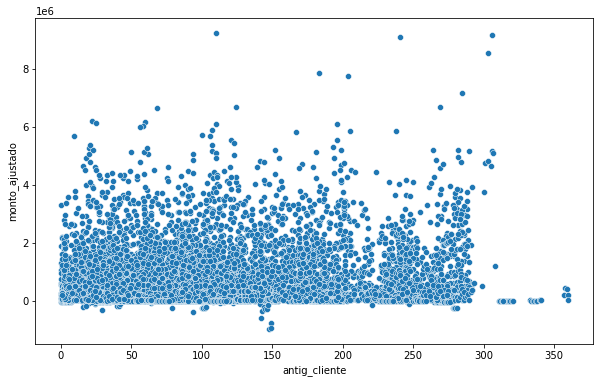

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_obj, x='antig_cliente', y='monto_ajustado', palette="pastel")

Observamos que estas variables no tienen una relación concluyente. De igual forma, procedemos a instanciar un modelo de regresión polinomial para las mismas.

In [31]:
# Selección del feature antigüedad
X_train_antig = (X_train_r.loc[:, 'antig_cliente'].values.reshape(-1,1))
X_val_antig = (X_val_r.loc[:, 'antig_cliente'].values.reshape(-1,1))
X_train_antig.shape, X_val_antig.shape

((4438, 1), (1902, 1))

In [32]:
train_errors = []
valid_errors = []
degrees = [0,1,2,3,4,5,6,7,8,9,10,11,12]
for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_antig, y_train_r)
    
    # predict:
    y_train_pred = model.predict(X_train_antig)
    y_valid_pred = model.predict(X_val_antig)
    
    train_error = mean_squared_error(y_train_r, y_train_pred)
    valid_error = mean_squared_error(y_val_r, y_valid_pred)
    train_errors.append(train_error)
    valid_errors.append(valid_error)
    print(f'Grado {degree}: Train error {train_error.round(3)},Valid error {valid_error.round(3)}') 

Grado 0: Train error 1089723320495.752,Valid error 1203506287597.062
Grado 1: Train error 1069238382861.971,Valid error 1186431826148.888
Grado 2: Train error 1069146302542.211,Valid error 1187892018296.054
Grado 3: Train error 1065849225297.144,Valid error 1199012492268.136
Grado 4: Train error 1065797000007.102,Valid error 1199007614118.519
Grado 5: Train error 1065473169794.981,Valid error 1195311670405.388
Grado 6: Train error 1062511009591.07,Valid error 1189395675524.402
Grado 7: Train error 1118918399487.574,Valid error 1231205289686.93
Grado 8: Train error 1167683155865.012,Valid error 1288601392385.453
Grado 9: Train error 1213016997237.485,Valid error 1355758021567.03
Grado 10: Train error 1303934933953.326,Valid error 1477528625168.119
Grado 11: Train error 1345604325399.96,Valid error 1513154853950.478
Grado 12: Train error 1385233991278.136,Valid error 1539476267115.792


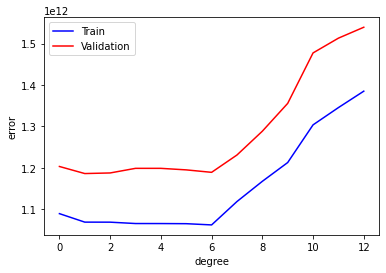

In [33]:
plt.plot(degrees, train_errors, color="blue", label="Train")
plt.plot(degrees, valid_errors, color="red", label="Validation")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

Observamos que a partir del polinomio de grado 6, se agravan los errores de train y validación. 

In [34]:
# sin vector bais primero
degree = 6
pf = PolynomialFeatures(degree, include_bias=False)
lr = LinearRegression(fit_intercept=False)  
model = make_pipeline(pf, lr)

In [35]:
# Entrenamos el modelo
model.fit(X_train_antig, y_train_r)

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=6, include_bias=False)),
                ('linearregression', LinearRegression(fit_intercept=False))])

In [36]:
# Vemos los parametros
lr.coef_ , lr.intercept_

(array([ 5.85937126e+04, -1.53528386e+03,  1.76327757e+01, -9.66257654e-02,
         2.50188959e-04, -2.46019357e-07]), 0.0)

In [37]:
x_start = min(np.min(X_train_antig), np.min(X_val_antig))
x_end = max(np.max(X_train_antig), np.max(X_val_antig))
x = np.linspace(x_start, x_end).reshape(-1)
x.shape

(50,)

In [38]:
# Predicción
y_predic_antig = model.predict(x.reshape(-1, 1))

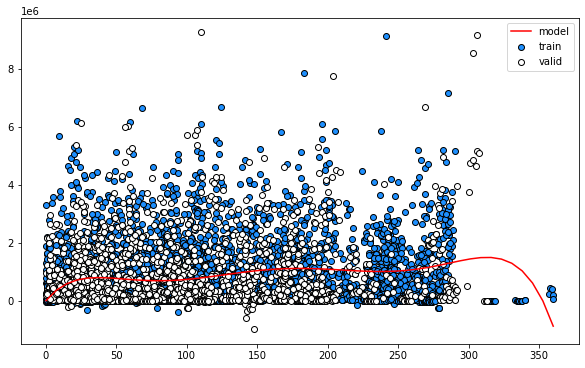

Train error: 1062511009591.070068
Valid error: 1189395675524.402588


In [39]:
plt.figure(figsize=(10,6))
plt.scatter(X_train_antig, y_train_r, color="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_val_antig, y_val_r, color="white", edgecolor="k", label="valid")
plt.plot(x, y_predic_antig, color="red", label="model") 
plt.legend()
plt.show()

print(f'Train error: {train_errors[degree]:f}')
print(f'Valid error: {valid_errors[degree]:f}')

#### Con vector de Bias

In [40]:
# con vector bias primero
degree = 6
pf = PolynomialFeatures(degree)
lr = LinearRegression(fit_intercept=False)  
model = make_pipeline(pf, lr)

In [41]:
# Entrenamos el modelo
model.fit(X_train_antig, y_train_r)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=6)),
                ('linearregression', LinearRegression(fit_intercept=False))])

In [42]:
# Vemos los parametros
lr.coef_ , lr.intercept_

(array([ 6.38921279e+05,  1.23007723e+04, -4.66294023e+02,  6.65745922e+00,
        -4.11881821e-02,  1.15491558e-04, -1.20505365e-07]), 0.0)

In [43]:
x_start = min(np.min(X_train_antig), np.min(X_val_antig))
x_end = max(np.max(X_train_antig), np.max(X_val_antig))
x = np.linspace(x_start, x_end).reshape(-1)
x.shape

(50,)

In [44]:
# Predicción
y_predic_antig_2 = model.predict(x.reshape(-1, 1))

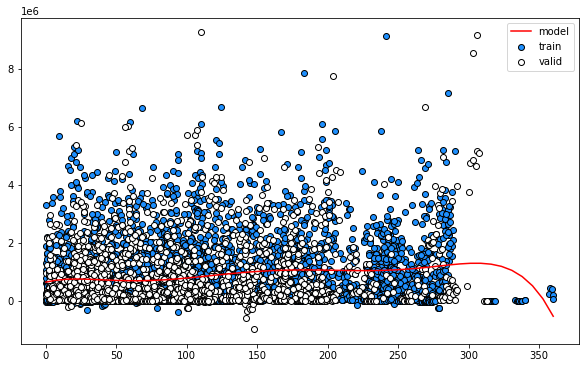

Train error: 1062511009591.070068
Valid error: 1189395675524.402588


In [45]:
plt.figure(figsize=(10,6))
plt.scatter(X_train_antig, y_train_r, color="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_val_antig, y_val_r, color="white", edgecolor="k", label="valid")
plt.plot(x, y_predic_antig_2, color="red", label="model") 
plt.legend()
plt.show()

print(f'Train error: {train_errors[degree]:f}')
print(f'Valid error: {valid_errors[degree]:f}')

### 3.2 Regresion polinomial con varias variables

In [46]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()

,dni_titular_movimiento,anio_mes_cupon,antig_cliente,comercio_cat=0,comercio_cat=1,comercio_cat=2,comercio_cat=3,comercio_cat=4,comercio_cat=5,comercio_cat=6,...,producto_naranja_movimiento=PL,producto_naranja_movimiento=PN,producto_naranja_movimiento=PP,producto_naranja_movimiento=TA,producto_naranja_movimiento=VI,producto_naranja_movimiento=ZE,tipo_producto_tarjeta_movimiento=0,tipo_producto_tarjeta_movimiento=3,tipo_producto_tarjeta_movimiento=4,fg_aumentado
0,000000b5aea2c9ea7cc155f6ebcef97f826,202008,225,69.0,0.0,0.0,0.0,0.0,0.0,0.0,...,69.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,0
1,000000b5aea2c9ea7cc155f6ebcef97f826,202009,226,69.0,0.0,0.0,0.0,0.0,0.0,0.0,...,69.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,0
2,000000b5aea2c9ea7cc155f6ebcef97f826,202010,227,69.0,0.0,0.0,0.0,0.0,0.0,0.0,...,69.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,0
3,000000b5aea2c9ea7cc155f6ebcef97f826,202011,228,69.0,0.0,0.0,0.0,0.0,0.0,0.0,...,69.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,0
4,000000b5aea2c9ea7cc155f6ebcef97f826,202012,229,69.0,0.0,0.0,0.0,0.0,0.0,0.0,...,69.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5253,000ac4ec2b6ddf0ba5800293557f37da945,202008,68,276.0,0.0,0.0,0.0,0.0,0.0,621.0,...,759.0,0.0,0.0,0.0,0.0,138.0,138.0,759.0,0.0,0
5254,000ac4ec2b6ddf0ba5800293557f37da945,202009,69,138.0,0.0,0.0,0.0,0.0,0.0,552.0,...,690.0,0.0,0.0,0.0,0.0,0.0,138.0,552.0,0.0,0
5255,000ac4ec2b6ddf0ba5800293557f37da945,202010,70,207.0,0.0,0.0,0.0,0.0,0.0,345.0,...,552.0,0.0,0.0,0.0,0.0,0.0,207.0,345.0,0.0,0
5256,000ac4ec2b6ddf0ba5800293557f37da945,202011,71,345.0,0.0,0.0,0.0,0.0,0.0,0.0,...,345.0,0.0,0.0,0.0,0.0,0.0,345.0,0.0,0.0,0


In [136]:
X_train_r.drop(['dni_titular_movimiento'], axis=1).dtypes

anio_mes_cupon                          int64
antig_cliente                           int64
comercio_cat=0                        float64
comercio_cat=1                        float64
comercio_cat=2                        float64
comercio_cat=3                        float64
comercio_cat=4                        float64
comercio_cat=5                        float64
comercio_cat=6                        float64
comercio_cat=7                        float64
comercio_cat=8                        float64
comercio_cat=9                        float64
producto_naranja_movimiento=AX        float64
producto_naranja_movimiento=EX        float64
producto_naranja_movimiento=MC        float64
producto_naranja_movimiento=PC        float64
producto_naranja_movimiento=PL        float64
producto_naranja_movimiento=PN        float64
producto_naranja_movimiento=PP        float64
producto_naranja_movimiento=TA        float64
producto_naranja_movimiento=VI        float64
producto_naranja_movimiento=ZE    

In [137]:
from sklearn.compose import make_column_transformer

scaler = MaxAbsScaler() # Mantiene el signo y el 0
X_train_vs = scaler.fit_transform(X_train_r.drop(['dni_titular_movimiento'], axis=1))
X_val_vs = scaler.transform(X_val_r.drop(['dni_titular_movimiento'], axis=1))

y_train_vs = scaler.fit_transform(y_train_r.values.reshape(-1,1))
y_val_vs = scaler.transform(y_val_r.values.reshape(-1,1))

In [143]:
train_errors_vs = []
valid_errors_vs = []
degrees = [1,2]
for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_vs, y_train_vs)
    
    # predict:
    y_train_pred = model.predict(X_train_vs)
    y_valid_pred = model.predict(X_val_vs)
    
    # evaluate:
    train_error = mean_squared_error(y_train_r, y_train_pred)
    val_error = mean_squared_error(y_val_r, y_valid_pred)
    train_errors_vs.append(train_error)
    valid_errors_vs.append(val_error)
    print(f'Grado {degree}: Train error {train_error.round(3)}, Valid error {val_error.round(3)}')  

Grado 1: Train error 1799440459557.533, Valid error 1883763143449.915
Grado 2: Train error 1799440434649.884, Valid error 7150079707033.199


In [ ]:
plt.plot(degrees, train_errors_vs, color="blue", label="Train")
plt.plot(degrees, valid_errors_vs, color="red", label="Validation")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

Observamos que a partir del polinomio de grado 3 el modelo comienza a hacer overfiting, es decir si bien el error en train sigue disminuyendo no ocurre lo mismo con el error de validación, el cual se dispara. 

### 3.3 Elección del mejor modelo de Regresión 

Observamos que el modelo de regresión polinomial multivariado, nos permite obtener mejores resultados que el anterior. Esto es así, debido a que los features escogidos explican mejor el comportamiento de nuestra variable target. Por otro lado, se realizo un escalado previo al entrenamiento. 
Procedemos a evaluar con los datos de test. 

In [42]:
degree = 3
pf = PolynomialFeatures(degree)
lr = LinearRegression(fit_intercept=False)  
model = make_pipeline(pf, lr)

In [122]:
# Entrenamos el modelo
model.fit(X_train_vs, y_train_r_esc)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression(fit_intercept=False))])

In [123]:
X_test_vs = scaler.fit_transform(X_test_r.loc[:, columnas ].values)
y_test_r_esc = scaler.fit_transform(y_reg_test.values.reshape(-1,1))
X_test_vs.shape , y_test_r_esc.shape

((771, 7), (771, 1))

In [124]:
# Predicción en test
y_train_pred = model.predict(X_train_vs)
y_valid_pred = model.predict(X_val_vs)
y_test_pred = model.predict(X_test_vs)

In [125]:
# testing:
train_error = mean_squared_error(y_train_r_esc, y_train_pred)
val_error = mean_squared_error(y_val_r_esc, y_valid_pred)
test_error = mean_squared_error(y_test_r_esc, y_test_pred)
print("Train error:", train_error.round(3), "Validation error:", val_error.round(3), "Test error:", test_error.round(3)) 

Train error: 0.005 Validation error: 33.364 Test error: 329.279


Observamos que el error en test es considerablemente más alto que el observado en las etapas de entrenamiento y validación. Sin embargo, es el mejor modelo que se puede instanciar con una regresión polinomial. 

## 4. Modelos de clasificación

### 4.1 Distribución de la variable target

In [178]:
y_train_c.value_counts()

0    2812
1    1626
Name: fg_aumentado, dtype: int64

La variable target no está balanceado, hay una relación de 2/1 en el conjunto de etiquetas de etiquetas. Esto nos da la pauta que a la métrica a la cual tenemos que darle más importancia es al F1-Score de la etiqueta 1, es decir queremos tener una buena Precisión y Recall para la etiqueta de menor cuantía. 

### 4.2 Modelos lineales de clasificación 

#### 4.2.1 Regresión Logistica

In [179]:
X_train_c.shape, y_train_c.shape

((4438, 26), (4438,))

In [188]:
num_cols = np.array(['antig_cliente'])
cat_cols = np.array(X_train_c.columns[4:])

In [189]:
X_train_lreg = X_train_c[np.concatenate((num_cols,cat_cols))]
X_val_lreg = X_val_c[np.concatenate((num_cols,cat_cols))]

pipe = Pipeline([('scaler', StandardScaler()), ('lreg', LogisticRegression(random_state=0))])

pipe.fit(X_train_lreg, y_train_c)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lreg', LogisticRegression(random_state=0))])

In [190]:
pipe['lreg'].classes_

array([0, 1])

In [191]:
pipe['lreg'].coef_

array([[-0.06013254, -0.15366412, -0.09109375, -0.0029165 ,  0.03199361,
         0.03426988,  0.06548672,  0.0260232 , -0.00218484, -0.12502322,
         0.03338826, -0.03771486,  0.10113351,  0.24656461,  0.04854482,
         0.06239834,  0.26103903, -0.02347546,  0.27888236,  0.20238223,
         0.27234575,  0.54157173,  0.04818402]])

In [192]:
pipe['lreg'].get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [193]:
y_train_pred_lreg = pipe.predict(X_train_lreg)
y_val_pred_lreg = pipe.predict(X_val_lreg)

In [194]:
# Evaluar train
text = "Logistic Regression - Reporte de clasificación del conjunto de train" 
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_train_c, y_train_pred_lreg))

Logistic Regression - Reporte de clasificación del conjunto de train
              precision    recall  f1-score   support

           0       0.69      0.88      0.77      2812
           1       0.61      0.33      0.43      1626

    accuracy                           0.68      4438
   macro avg       0.65      0.60      0.60      4438
weighted avg       0.66      0.68      0.65      4438



In [195]:
# Evaluar validacion
text = "Logistic Regression - Reporte de clasificación del conjunto de validacion" 
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_val_c, y_val_pred_lreg))

Logistic Regression - Reporte de clasificación del conjunto de validacion
              precision    recall  f1-score   support

           0       0.68      0.87      0.76      1178
           1       0.60      0.32      0.42       724

    accuracy                           0.66      1902
   macro avg       0.64      0.59      0.59      1902
weighted avg       0.65      0.66      0.63      1902



Text(0.5, 1.0, 'Regresión Logística - Matriz de confusión del conjunto de train sin normalizar\n')

<Figure size 432x288 with 0 Axes>

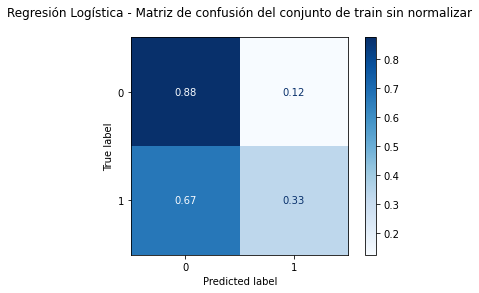

In [206]:
plt.figure()
plot_confusion_matrix(estimator=pipe, X=X_train_lreg, y_true=y_train_c,
                      normalize='true', cmap='Blues').ax_ \
                      .set_title('Regresión Logística - Matriz de confusión del conjunto de train sin normalizar\n')

Text(0.5, 1.0, 'Regresión Logística - Matriz de confusión del conjunto de train sin normalizar\n')

<Figure size 432x288 with 0 Axes>

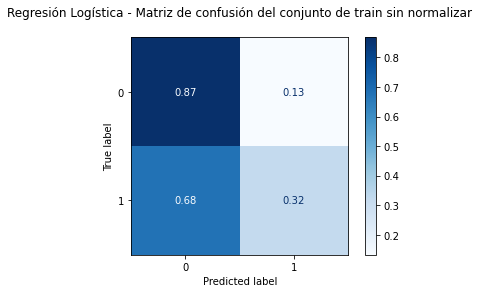

In [207]:
plt.figure()
plot_confusion_matrix(estimator=pipe, X=X_val_lreg, y_true=y_val_c,
                      normalize='true', cmap='Blues').ax_ \
                      .set_title('Regresión Logística - Matriz de confusión del conjunto de train sin normalizar\n')

Los resultados para el modelo de Regresión Logístico, no son del todo buenos, sin embargo nos da una primera referencia de métricas, para poder mejorar en los siguientes modelos. 
Sin bien se intento normalizar los features, la predicción no era buena (no predecia la etiqueta 0), por lo cual optamos por realizar un escalado de los datos utilizando StandardScaler. 

#### 4.2.2 SGDClassifier 

In [208]:
scaler = StandardScaler()
X_train_sgd = scaler.fit_transform(X_train_lreg)
X_val_sgd = scaler.fit_transform(X_val_lreg)
X_train_sgd.shape, X_val_sgd.shape

((4438, 23), (1902, 23))

In [209]:
param_grid = {
    'loss': ['hinge','log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'alpha': [0.001, 0.01, 0.1, 1],
    'penalty': ['l2','l1'],
    'eta0': [1e-3, 1e-4, 1e-5, 10],
    'learning_rate': ['optimal', 'constant', 'adaptive']
    #'max_iter': [1000, 2000, 5000]
}

model = SGDClassifier(random_state= 0, shuffle=False)
cv = GridSearchCV(model, param_grid, scoring='f1',cv=3)
cv.fit(X_train_sgd, y_train_c)
#cv.fit(X, y)

#results = cv.cv_results_
#params = results['params']

/Users/lucianomantovani/opt/miniconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/lucianomantovani/opt/miniconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/lucianomantovani/opt/miniconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/lucianomantovani/opt/miniconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:577: Converg

GridSearchCV(cv=3, estimator=SGDClassifier(random_state=0, shuffle=False),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1],
                         'eta0': [0.001, 0.0001, 1e-05, 10],
                         'learning_rate': ['optimal', 'constant', 'adaptive'],
                         'loss': ['hinge', 'log', 'modified_huber',
                                  'squared_hinge', 'perceptron'],
                         'penalty': ['l2', 'l1']},
             scoring='f1')

In [210]:
cv.best_estimator_

SGDClassifier(alpha=0.1, eta0=0.001, loss='squared_hinge', penalty='l1',
              random_state=0, shuffle=False)

In [211]:
clf_best = cv.best_estimator_
y_train_pred = clf_best.predict(X_train_sgd)
y_val_pred = clf_best.predict(X_val_sgd)

In [212]:
# Métricas en train
text = "SGDClassifier - Reporte de clasificación del conjunto de train" 
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_train_c, y_train_pred))

SGDClassifier - Reporte de clasificación del conjunto de train
              precision    recall  f1-score   support

           0       0.73      0.58      0.65      2812
           1       0.46      0.62      0.53      1626

    accuracy                           0.60      4438
   macro avg       0.60      0.60      0.59      4438
weighted avg       0.63      0.60      0.61      4438



In [213]:
# Evaluar con datos de validación
text = "SGDClassifier - Reporte de clasificación del conjunto de validación" 
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_val_c, y_val_pred))

SGDClassifier - Reporte de clasificación del conjunto de validación
              precision    recall  f1-score   support

           0       0.69      0.65      0.67      1178
           1       0.48      0.53      0.50       724

    accuracy                           0.60      1902
   macro avg       0.58      0.59      0.59      1902
weighted avg       0.61      0.60      0.60      1902



Observamos que las métricas obtenidas son mejores para el caso de la regresión logística, con parámetros por defecto calculada en primer instancia. A continuación, probaremos un modelo de clasificación no lineal, el árbol de decisión. 

Text(0.5, 1.0, 'SGD - Matriz de confusión del conjunto de train')

<Figure size 432x288 with 0 Axes>

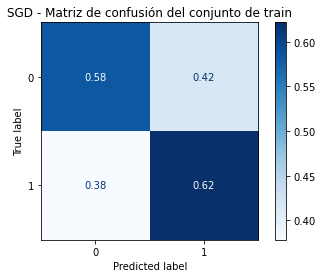

In [214]:
plt.figure()
plot_confusion_matrix(estimator=clf_best, X=X_train_sgd, y_true=y_train_c,
                      normalize='true', cmap='Blues').ax_ \
                      .set_title('SGD - Matriz de confusión del conjunto de train')

Text(0.5, 1.0, 'SGD - Matriz de confusión del conjunto de train sin normalizar\n')

<Figure size 432x288 with 0 Axes>

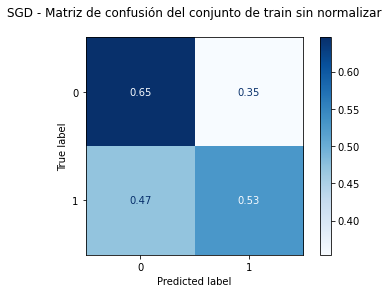

In [215]:
plt.figure()
plot_confusion_matrix(estimator=clf_best, X=X_val_sgd, y_true=y_val_c,
                      normalize='true', cmap='Blues').ax_ \
                      .set_title('SGD - Matriz de confusión del conjunto de train sin normalizar\n')

### 4.3 Modelos no lineales de clasificación: Árboles de decisión 

In [216]:
X_train_tree = X_train_sgd
X_val_tree = X_val_sgd

In [224]:
param_grid = {
    'max_depth': [10, 15, 20, 25, 30],
    'criterion':['gini', 'entropy'],
    'min_samples_split': [3,5, 10, 15, 20, 25,30],
    'min_samples_leaf':[2, 4, 5, 6, 8, 10]}

model_tree = DecisionTreeClassifier(random_state= 0)
cv_tree = GridSearchCV(model_tree, param_grid, scoring='f1', cv=5)
cv_tree.fit(X_train_tree, y_train_c)
#cv.fit(X, y)

#results_tree = cv.cv_results_
#params_tree = results_tree['params']

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 25, 30],
                         'min_samples_leaf': [2, 4, 5, 6, 8, 10],
                         'min_samples_split': [3, 5, 10, 15, 20, 25, 30]},
             scoring='f1')

In [227]:
cv_tree.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=3, random_state=0)

In [226]:
clf_best_tree = cv_tree.best_estimator_
y_train_pred_tree = clf_best_tree.predict(X_train_tree)
y_val_pred_tree = clf_best_tree.predict(X_val_tree)

In [222]:
# Métricas en train
text = "Árbol - Reporte de clasificación del conjunto de train" 
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_train_c, y_train_pred_tree))

Árbol - Reporte de clasificación del conjunto de train
              precision    recall  f1-score   support

           0       0.74      0.83      0.78      2812
           1       0.63      0.49      0.55      1626

    accuracy                           0.71      4438
   macro avg       0.68      0.66      0.67      4438
weighted avg       0.70      0.71      0.70      4438



In [223]:
# Métricas en validación
text = "Árbol - Reporte de clasificación del conjunto de validación" 
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_val_c, y_val_pred_tree))

Árbol - Reporte de clasificación del conjunto de validación
              precision    recall  f1-score   support

           0       0.72      0.75      0.73      1178
           1       0.56      0.53      0.55       724

    accuracy                           0.66      1902
   macro avg       0.64      0.64      0.64      1902
weighted avg       0.66      0.66      0.66      1902



En una primera instancia se creo un modelo de árbol de decisión con parametros por defecto, el cual llegaba a una profundidad de 33, realizando overfiting sobre el conjunto de entrenamiento. Sin embargo, esto nos permitió en primer lugar, comprobar que con estos datos es posible la predicción de la variable objetivo utilizando este modelo y por otro lado, tener una serie de parémetros de referencia para poder encontrar el mejor árbol. 

Se observa que se logran mejores resultados en f1-score con un árbol de decisión, en comparación con los modelos lineales instanciados en el apartado anterior.

Text(0.5, 1.0, 'Árbol - Matriz de confusión del conjunto de train')

<Figure size 432x288 with 0 Axes>

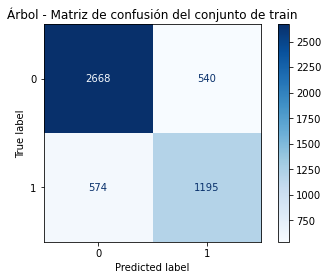

In [73]:
plt.figure()
plot_confusion_matrix(estimator=clf_best_tree, X=X_train_tree, y_true=y_train_c,
                      normalize='true', cmap='Blues').ax_ \
                      .set_title('Árbol - Matriz de confusión del conjunto de train')

Text(0.5, 1.0, 'Árbol - Matriz de confusión del conjunto de train sin normalizar\n')

<Figure size 432x288 with 0 Axes>

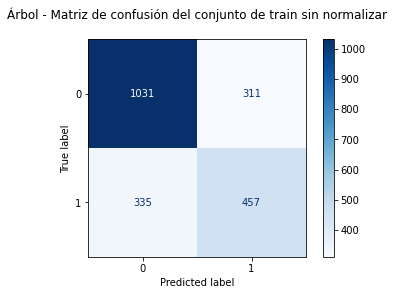

In [74]:
plt.figure()
plot_confusion_matrix(estimator=clf_best_tree, X=X_val_tree, y_true=y_val_c,
                      normalize='true', cmap='Blues').ax_ \
                      .set_title('Árbol - Matriz de confusión del conjunto de train sin normalizar\n')

### 4.4 Elección del mejor modelo de Clasificación

In [75]:
X_test_c = X_test_c[np.concatenate((num_cols,cat_cols))]
X_test_c = scaler.fit_transform(X_test_c)

In [76]:
# Entrenamos el modelo
clf_best_tree.fit(X_train_tree, y_train_c)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       min_samples_split=20, random_state=0)

In [77]:
# Predicción en val y test
y_train_pred_tree = clf_best_tree.predict(X_train_tree)
y_val_pred_tree = clf_best_tree.predict(X_val_tree)
y_test_pred_tree = clf_best_tree.predict(X_test_c)

In [78]:
# Métricas en train
text = "Árbol - Reporte de clasificación del conjunto de train" 
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_train_c, y_train_pred_tree))

Árbol - Reporte de clasificación del conjunto de train
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      3208
           1       0.69      0.68      0.68      1769

    accuracy                           0.78      4977
   macro avg       0.76      0.75      0.75      4977
weighted avg       0.78      0.78      0.78      4977



In [79]:
# Métricas en validación
text = "Árbol - Reporte de clasificación del conjunto de validación" 
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_val_c, y_val_pred_tree))

Árbol - Reporte de clasificación del conjunto de validación
              precision    recall  f1-score   support

           0       0.75      0.77      0.76      1342
           1       0.60      0.58      0.59       792

    accuracy                           0.70      2134
   macro avg       0.67      0.67      0.67      2134
weighted avg       0.70      0.70      0.70      2134



In [80]:
# Métricas en test
text = "Árbol - Reporte de clasificación del conjunto de validación" 
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_cla_test, y_test_pred_tree))

Árbol - Reporte de clasificación del conjunto de validación
              precision    recall  f1-score   support

           0       0.91      0.79      0.85       337
           1       0.36      0.61      0.45        66

    accuracy                           0.76       403
   macro avg       0.64      0.70      0.65       403
weighted avg       0.82      0.76      0.78       403



Text(0.5, 1.0, 'Árbol - Matriz de confusión del conjunto de test')

<Figure size 432x288 with 0 Axes>

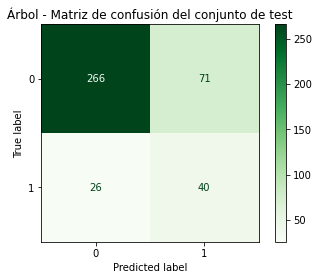

In [81]:
plt.figure()
plot_confusion_matrix(estimator=clf_best_tree, X=X_test_c, y_true=y_cla_test,
                      normalize='true', cmap='Greens').ax_ \
                      .set_title('Árbol - Matriz de confusión del conjunto de test')